In [ ]:
import pandas as pd
import numpy as np

# Read the CSV data (assuming it's in a string or file)
# For this example, I'll assume we have it as a string from your input
# In practice, you might read from a file: df = pd.read_csv('filename.csv')
df = pd.read_csv('your_data.csv')  # Replace with actual data source

# 1. Basic Data Inspection
print("Initial Data Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

# 2. Remove unnecessary column 'Unnamed: 0' if it exists
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

# 3. Handle missing values
# Fill missing numerical values with median
numeric_columns = df.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    df[col] = df[col].fillna(df[col].median())

# Fill missing categorical values with mode
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# 4. Standardize data types
# Convert date columns to datetime
date_columns = ['dob', 'trans_date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Convert time to proper format
df['trans_time'] = pd.to_datetime(df['trans_time'], format='%H:%M:%S', errors='coerce').dt.time

# Convert numerical columns
df['zip'] = df['zip'].astype(int)
df['amt'] = df['amt'].astype(float)
df['is_fraud'] = df['is_fraud'].astype(int)
df['unix_time'] = df['unix_time'].astype(int)
df['quarter'] = df['quarter'].astype(int)

# 5. Clean specific columns
# Remove leading/trailing whitespace from string columns
for col in categorical_columns:
    df[col] = df[col].str.strip()

# Standardize gender to M/F
df['gender'] = df['gender'].str.upper().replace({'MALE': 'M', 'FEMALE': 'F'})

# Clean merchant names by removing 'fraud_' prefix
df['merchant'] = df['merchant'].str.replace('fraud_', '')

# 6. Handle duplicates
# Remove exact duplicates
df = df.drop_duplicates()

# 7. Validate and clean geographical coordinates
# Ensure latitude is between -90 and 90
df['lat'] = df['lat'].clip(-90, 90)
df['merch_lat'] = df['merch_lat'].clip(-90, 90)

# Ensure longitude is between -180 and 180
df['long'] = df['long'].clip(-180, 180)
df['merch_long'] = df['merch_long'].clip(-180, 180)

# 8. Validate and clean monetary amounts
df['amt'] = df['amt'].clip(lower=0)  # Ensure no negative amounts

# 9. Standardize state abbreviations
df['state'] = df['state'].str.upper()

# 10. Add derived columns if needed
# Calculate age from DOB
current_date = pd.to_datetime('2025-03-15')  # Using current date from your context
df['age'] = ((current_date - df['dob']).dt.days / 365.25).astype(int)

# 11. Final data validation
# Check for any remaining null values
print("\nFinal Missing Values:")
print(df.isnull().sum())

# Display basic statistics
print("\nCleaned Data Statistics:")
print(df.describe())

# Display first few rows of cleaned data
print("\nFirst 5 rows of cleaned data:")
print(df.head())

# Optional: Save cleaned data
# df.to_csv('cleaned_data.csv', index=False)

In [3]:
def map_job_to_category(job):
    """
    Maps a job title to one of 15 predefined categories using if-else logic.
    
    Args:
        job (str): The job title to categorize.
    
    Returns:
        str: The category name corresponding to the job title.
    """
    # Convert job to lowercase for case-insensitive matching
    job = job.lower().strip()
    
    # Category 1: Finance
    if job in ["financial adviser", "banker", "investment banker", "chief financial officer", "accountant"]:
        return "Finance"
    
    # Category 2: Engineering
    elif job in ["engineer, electrical", "engineer, mechanical", "engineer, automotive", "engineer, manufacturing", "engineer, site"]:
        return "Engineering"
    
    # Category 3: Education
    elif job in ["teacher, primary", "teacher, secondary", "librarian, academic", "education administrator"]:
        return "Education"
    
    # Category 4: Design
    elif job in ["designer, graphic", "designer, fashion", "designer, exhibition/display", "designer, interior/spatial"]:
        return "Design"
    
    # Category 5: Healthcare
    elif job in ["nurse, mental health", "nurse, paediatric", "doctor, general practice", "psychiatric nurse", "medical physicist"]:
        return "Healthcare"
    
    # Category 6: Science
    elif job in ["scientist, biomedical", "scientist, marine", "forensic scientist", "microbiologist", "medical laboratory scientific officer"]:
        return "Science"
    
    # Category 7: Surveying
    elif job in ["surveyor, quantity", "surveyor, land", "surveyor, planning and development", "surveyor, commercial/residential"]:
        return "Surveying"
    
    # Category 8: Therapy
    elif job in ["therapist, speech", "therapist, art", "occupational psychologist", "speech and language therapist"]:
        return "Therapy"
    
    # Category 9: Management
    elif job in ["manager, retail", "manager, hotel", "public house manager", "chief executive officer", "production manager"]:
        return "Management"
    
    # Category 10: Media
    elif job in ["journalist, newspaper", "journalist, magazine", "editor, magazine features", "broadcast journalist"]:
        return "Media"
    
    # Category 11: Architecture
    elif job in ["architect", "architect, structural", "architect, landscape"]:
        return "Architecture"
    
    # Category 12: Administration
    elif job in ["officer, public relations", "officer, immigration", "administrator", "human resources officer"]:
        return "Administration"
    
    # Category 13: Consulting
    elif job in ["consultant, environmental", "consultant, financial", "lobbyist", "consulting civil engineer"]:
        return "Consulting"
    
    # Category 14: Technical
    elif job in ["technician, it", "technician, scientific", "technical author", "medical technical officer"]:
        return "Technical"
    
    # Category 15: Miscellaneous
    elif job in ["kids_pets", "entertainment", "sub", "make", "best boy"]:  # Unusual or unclear job titles
        return "Miscellaneous"
    
    # Default case: If job doesn't match any predefined list, assign to Miscellaneous
    else:
        return "Miscellaneous"

# Example usage with the CSV data
import pandas as pd

# Load the CSV data (assuming the file is available locally)
# For this example, I'll simulate loading it from the provided text
data = """
Unnamed: 0,ssn,cc_num,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,acct_num,profile,trans_num,trans_date,trans_time,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long,quarter
18832098,087-12-2118,639017474813,Zachary,Parks,M,94238 Jacob Cliff Apt. 458,Columbia,MO,65203,38.9348,-92.3639,139474,"Designer, exhibition/display",1970-10-23,941725909341,adults_50up_male_urban.json,a36eecc709911793fe140ba7d29404ca,2019-12-26,06:36:03,1577322363,entertainment,3.65,0,"fraud_Turcotte, McKenzie and Koss",37.978633,-91.813002,4
24801519,267-50-6963,6567701540795312,Jeremy,Soto,M,29865 Bush Centers,Goldendale,WA,98620,45.832,-120.813,7123,Psychiatric nurse,1983-08-03,856035171395,adults_2550_male_urban.json,5c0acce002c0e0b56de66d9de0cbff80,2019-12-28,22:53:34,1577553814,shopping_pos,5.25,0,fraud_Hermann and Sons,45.829641,-121.389115,4
"""
# Simulate loading into DataFrame
from io import StringIO
#df = pd.read_csv(StringIO(data))
df = pd.read_csv('../csv/credit_card_fraud_sample_2019_Dec_100K.csv')

# Apply the mapping function to the 'job' column
df['job_category'] = df['job'].apply(map_job_to_category)

# Display the resulting DataFrame with job categories
print(df[['job', 'job_category']])

# Show the distribution of job categories
print("\nJob Category Distribution:")
print(df['job_category'].value_counts())

                                         job   job_category
0               Designer, exhibition/display         Design
1                          Psychiatric nurse     Healthcare
2                  Occupational psychologist        Therapy
3                        Hospital pharmacist  Miscellaneous
4                          Medical physicist     Healthcare
...                                      ...            ...
99995    Exhibitions officer, museum/gallery  Miscellaneous
99996                 Holiday representative  Miscellaneous
99997  Engineer, control and instrumentation  Miscellaneous
99998                    Art gallery manager  Miscellaneous
99999                         Science writer  Miscellaneous

[100000 rows x 2 columns]

Job Category Distribution:
job_category
Miscellaneous     93149
Science             902
Engineering         647
Media               615
Design              545
Finance             530
Healthcare          517
Surveying           514
Management          

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

def categorize_jobs(df, job_column='job', n_categories=15):
    # Extract unique jobs and their frequencies
    job_counts = df[job_column].value_counts()
    unique_jobs = job_counts.index.tolist()
    
    # Use TF-IDF to create vector representations of job titles
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(unique_jobs)
    
    # Apply k-means clustering
    kmeans = KMeans(n_clusters=n_categories, random_state=42)
    clusters = kmeans.fit_predict(X)
    
    # Create a dictionary to map jobs to categories
    job_to_category = dict(zip(unique_jobs, clusters))
    
    # Assign categories to the original dataframe
    df['job_category'] = df[job_column].map(job_to_category)
    
    # Ensure balance by redistributing if necessary
    category_sizes = df['job_category'].value_counts()
    while category_sizes.max() - category_sizes.min() > 1:  # Aim for sizes within 1 of each other
        largest_cat = category_sizes.idxmax()
        smallest_cat = category_sizes.idxmin()
        # Find a job in the largest category to move
        job_to_move = df[df['job_category'] == largest_cat].iloc[0][job_column]
        df.loc[df[job_column] == job_to_move, 'job_category'] = smallest_cat
        category_sizes = df['job_category'].value_counts()
    
    return df

# Example usage:
df_job_cat = pd.read_csv('../csv/credit_card_fraud_sample_2019_Dec_100K.csv')
df_job_cat = categorize_jobs(df_job_cat)

In [5]:
import pandas as pd

# Define the mapping function
def map_job_to_category_by_keyword(job):
    """
    Maps a job title to a category based on the presence of keywords in the title.
    
    Args:
        job (str): The job title to categorize.
    
    Returns:
        str: The category name corresponding to the job title.
    """
    # Handle non-string or missing inputs
    job = job.lower().strip() if isinstance(job, str) else ''
    
    # Define categories and their associated keywords
    category_keywords = {
        "Finance": ["finance", "bank", "investment", "accountant", "cfo"],
        "Engineering": ["engineer", "mechanical", "electrical", "manufacturing", "site"],
        "Education": ["teacher", "educator", "librarian", "professor", "instructor"],
        "Design": ["designer", "graphic", "fashion", "exhibition", "interior"],
        "Healthcare": ["nurse", "doctor", "physician", "medical", "health"],
        "Science": ["scientist", "biomedical", "marine", "forensic", "laboratory"],
        "Surveying": ["surveyor", "quantity", "land", "planning", "development"],
        "Therapy": ["therapist", "speech", "art", "occupational", "psychologist"],
        "Management": ["manager", "director", "executive", "supervisor", "chief"],
        "Media": ["journalist", "editor", "reporter", "broadcast", "media"],
        "Architecture": ["architect", "structural", "landscape", "building"],
        "Administration": ["administrator", "officer", "coordinator", "clerk", "assistant"],
        "Consulting": ["consultant", "advisor", "analyst", "strategist", "specialist"],
        "Technical": ["technician", "it", "technical", "support", "maintenance"],
        "Miscellaneous": []  # Default category if no keywords match
    }
    
    # Check each category for a keyword match
    for category, keywords in category_keywords.items():
        if any(keyword in job for keyword in keywords):
            return category
    
    # If no keywords match, assign to Miscellaneous
    return "Miscellaneous"

# Load the CSV file into a DataFrame
# Replace 'your_file.csv' with the actual path to your CSV file
df = pd.read_csv('../csv/credit_card_fraud_sample_2019_Dec_100K.csv')

# Handle missing values in the 'job' column
df['job'] = df['job'].fillna('Unknown')

# Apply the mapping function to the 'job' column to create 'job_cat'
df['job_cat'] = df['job'].apply(map_job_to_category_by_keyword)

# (Optional) Save the updated DataFrame to a new CSV file
# Replace 'output_file.csv' with your desired output file name
#df.to_csv('output_file.csv', index=False)

# Display the first few rows to confirm
#print(df[['job', 'job_cat']].head())

print("\nJob Category Distribution:")
print(df['job_cat'].value_counts())


Job Category Distribution:
job_cat
Miscellaneous     28353
Engineering       10071
Management         9594
Administration     9384
Therapy            7533
Surveying          5479
Healthcare         4738
Design             4646
Science            4398
Technical          4057
Media              3730
Education          3292
Finance            2202
Consulting         1809
Architecture        714
Name: count, dtype: int64


In [10]:
def assign_time_segment(hour):
    if 0 <= hour < 6:
        return 'Late_Night_0-6'
    elif 6 <= hour < 12:
        return 'Morning_6-12'
    elif 12 <= hour < 18:
        return 'Afternoon_12-18'
    else:
        return 'Evening_18-24'

df['trans_time'] = pd.to_datetime(df['trans_time'], format='%H:%M:%S', errors='coerce') #.dt.time

df['trans_time_segment'] = df['trans_time'].dt.hour.apply(assign_time_segment)
df['trans_time_segment'].value_counts() 

trans_time_segment
Afternoon_12-18    33689
Evening_18-24      33408
Late_Night_0-6     16488
Morning_6-12       16415
Name: count, dtype: int64

###########################################################################################################################

In [13]:
import dask.dataframe as dd
import pandas as pd

# Load dataset using Dask = Lazy evaluation
#df = dd.read_csv('../csv/credit_card_fraud_sample_10K.csv', dtype={'trans_time': 'object'})

ddf = dd.read_csv('../csv/credit_card_fraud.csv', dtype={'trans_time': 'object'})
# Combine 'trans_date' and 'trans_time' into a single datetime column
ddf['Datetime'] = dd.to_datetime(df['trans_date'] + ' ' + df['trans_time'], format='%Y-%m-%d %H:%M:%S')

In [ ]:



def compute_monthly_fraud_percentage(df):
    
    # Extract month period
    df['Month'] = df['Datetime'].dt.to_period('M')

    # Group by month
    monthly_total = df.groupby('Month').size().rename('Total')
    monthly_fraud = df[df['is_fraud'] == 1].groupby('Month').size().rename('Fraud')

    # Merge and compute fraud percentage
    monthly_stats = dd.concat([monthly_total, monthly_fraud], axis=1)
    monthly_stats['Fraud'] = monthly_stats['Fraud'].fillna(0)
    monthly_stats['Fraud_Percentage'] = (monthly_stats['Fraud'] / monthly_stats['Total']) * 100

    # Execute the computation and sort by Month
    monthly_stats = monthly_stats.compute().sort_index()
    
    return monthly_stats

monthly_stats_full = compute_monthly_fraud_percentage(ddf)
print('Monthly stats full:')
print(monthly_stats_full)




c:\Users\DCervin\.conda\envs\ds18_ml-proj1\lib\site-packages\dask_expr\_concat.py:146: UserWarning: Concatenating dataframes with unknown divisions.
We're assuming that the indices of each dataframes are 
 aligned. This assumption is not generally safe.
  warnings.warn(


Monthly stats full:
           Total  Fraud  Fraud_Percentage
Month                                    
2019-01   970166   8248          0.850164
2019-02   894861   7207          0.805376
2019-03  1361254   8086          0.594011
2019-04  1250772   7773          0.621456
2019-05  1399709   8325          0.594766
2019-06  1638624   8196          0.500176
2019-07  1601861   7852          0.490180
2019-08  1671809   8296          0.496229
2019-09  1292073   8311          0.643230
2019-10  1291812   8091          0.626330
2019-11  1364656   7943          0.582051
2019-12  2606359   7873          0.302069
2020-01   982745   8031          0.817201
2020-02   956016   7512          0.785761
2020-03  1305878   7974          0.610624
2020-04  1258255   7743          0.615376
2020-05  1448073   8169          0.564129
2020-06  1558950   7642          0.490202
2020-07  1635879   7737          0.472957
2020-08  1669362   8427          0.504804
2020-09  1261903   8461          0.670495
2020-10  13367

c:\Users\DCervin\.conda\envs\ds18_ml-proj1\lib\site-packages\dask_expr\_concat.py:146: UserWarning: Concatenating dataframes with unknown divisions.
We're assuming that the indices of each dataframes are 
 aligned. This assumption is not generally safe.
  warnings.warn(


KeyboardInterrupt: 

In [15]:
tot_rows = ddf.shape[0].compute()
print(f"Total number of rows in the dataset: {tot_rows}")
frac = 300_000 / tot_rows

print(f"Fraction to sample: {frac}")

ddf_sample = df.sample(frac=frac, random_state=42)

monthly_stats_sample = compute_monthly_fraud_percentage(ddf_sample)
print('Monthly stats sample:')
print(monthly_stats_sample)

Total number of rows in the dataset: 34636378
Fraction to sample: 0.008661413730962285


c:\Users\DCervin\.conda\envs\ds18_ml-proj1\lib\site-packages\dask_expr\_concat.py:146: UserWarning: Concatenating dataframes with unknown divisions.
We're assuming that the indices of each dataframes are 
 aligned. This assumption is not generally safe.
  warnings.warn(


Monthly stats sample:
         Total  Fraud  Fraud_Percentage
Month                                  
2019-01   8435     67          0.794309
2019-02   7668     60          0.782473
2019-03  11917     75          0.629353
2019-04  10585     80          0.755786
2019-05  12005     82          0.683049
2019-06  14225     59          0.414763
2019-07  14029     76          0.541735
2019-08  14271     71          0.497512
2019-09  11370     83          0.729991
2019-10  11348     64          0.563976
2019-11  11737     66          0.562324
2019-12  22544     68          0.301632
2020-01   8495     54          0.635668
2020-02   8288     59          0.711873
2020-03  11301     79          0.699053
2020-04  10842     68          0.627191
2020-05  12634     79          0.625297
2020-06  13427     76          0.566024
2020-07  14201     67          0.471798
2020-08  14419     77          0.534018
2020-09  10912     72          0.659824
2020-10  11443     55          0.480643
2020-11  11462    

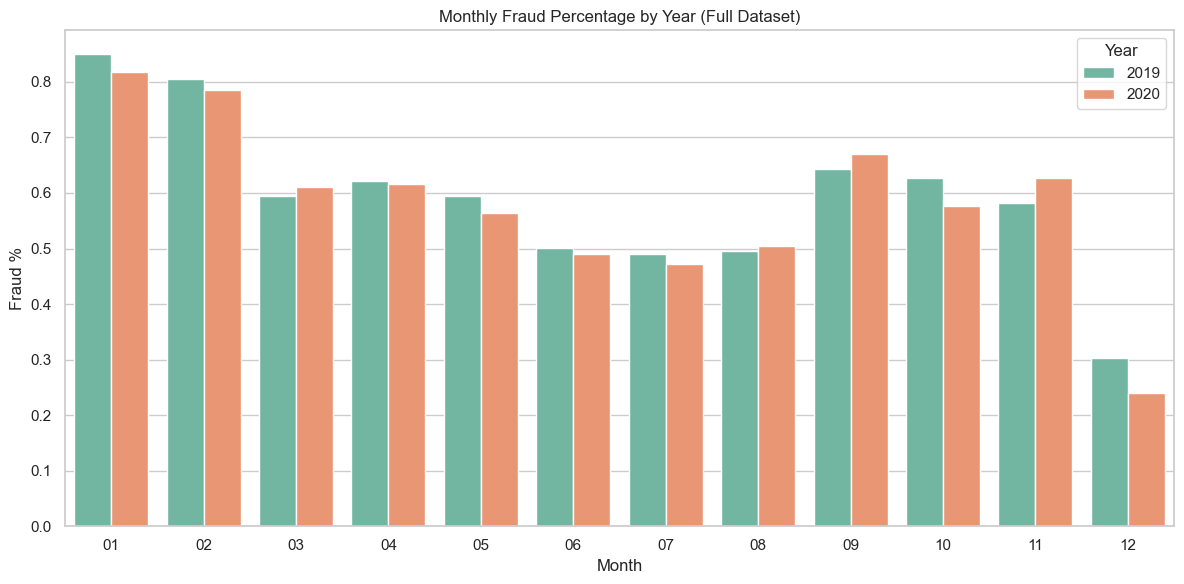

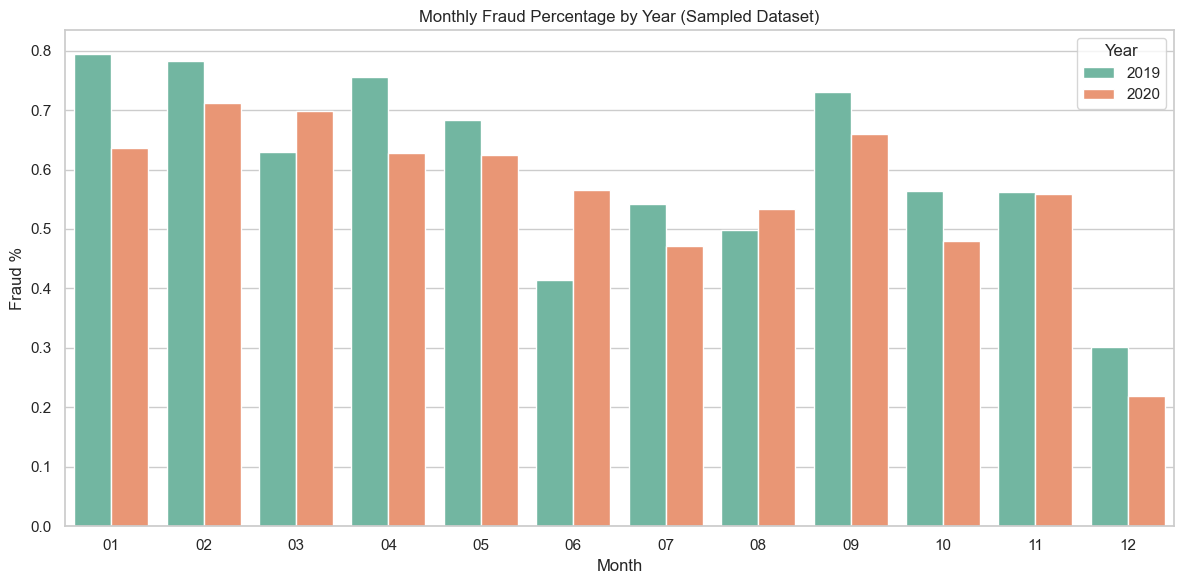

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_monthly_fraud_percentage(mon_stats, title='Monthly Fraud Percentage by Year'):
    # Reset index to access 'Month' as a column
    mon_stats = mon_stats.reset_index()

    # Split month into year and month components
    mon_stats['Year'] = mon_stats['Month'].astype(str).str[:4]
    mon_stats['MonthName'] = mon_stats['Month'].astype(str).str[5:7]  # e.g., '01', '02', etc.

    # Combine for sort and label
    mon_stats['Month_Label'] = mon_stats['MonthName']  # Will be x-axis (e.g., Jan, Feb...)
    mon_stats['Year'] = mon_stats['Year'].astype(str)

    # Sort by month name and year to make bars aligned (e.g., all Jan, all Feb)
    mon_stats = mon_stats.sort_values(by=['MonthName', 'Year'])

    # Plot
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=mon_stats,
        x='Month_Label',
        y='Fraud_Percentage',
        hue='Year',
        palette='Set2'
    )

    plt.title(title)
    plt.ylabel('Fraud %')
    plt.xlabel('Month')
    plt.legend(title='Year')
    plt.tight_layout()
    plt.show()

plot_monthly_fraud_percentage(monthly_stats_full, title='Monthly Fraud Percentage by Year (Full Dataset)')
plot_monthly_fraud_percentage(monthly_stats_sample, title='Monthly Fraud Percentage by Year (Sampled Dataset)')


###Both show visual simiality, proceed to Chi-Square Test

In [23]:
from scipy.stats import chi2_contingency

ddf_2020 = ddf[ddf['Datetime'].dt.year == 2020]
ddf_sample_2020 = ddf_sample[ddf_sample['Datetime'].dt.year == 2020]

# Chi-Square Test for 'category' column in 2020 subset
full_counts_2020 = ddf_2020['is_fraud'].value_counts()
sample_counts_2020 = ddf_sample_2020['is_fraud'].value_counts()

# Align and fill missing
comparison_2020 = pd.DataFrame({
    'full': full_counts_2020,
    'sample': sample_counts_2020
}).fillna(0)

# Run chi-square test
chi2_2020, p_chi2_2020, dof_2020, expected_2020 = chi2_contingency([comparison_2020['full'], comparison_2020['sample']])

# Return test results
result = {
    'Chi-Square Test for 2020': {
        'chi2_statistic': chi2_2020,
        'p_value': p_chi2_2020,
        'degrees_of_freedom': dof_2020
    }
}

print(result)

{'Chi-Square Test for 2020': {'chi2_statistic': 0.1993745447768406, 'p_value': 0.6552261697675091, 'degrees_of_freedom': 1}}


✅ What This Means:
🔹 Chi² Statistic = 0.199
This value measures how much the observed counts deviate from the expected counts.

A low value indicates that the sample and expected distributions are very close.

🔹 Degrees of Freedom = 1
This suggests you were comparing two categories — perhaps a binary variable (e.g., is_fraud, gender, or another yes/no type column).

🔹 p-value = 0.655
A p-value > 0.05 means the result is not statistically significant.

You fail to reject the null hypothesis — which states that the distributions are the same.

🧠 Interpretation:
The sample distribution is statistically consistent with the full dataset (at least for the variable tested). There's no meaningful difference between them — the variation observed is likely due to random chance.

✅ TL;DR:
✔️ Your sample accurately represents the full dataset (for that specific categorical variable).

✔️ No statistically significant difference was found.

📌 You can confidently use the sample for analysis without worrying about bias — at least from this variable's distribution.